In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

In [2]:
ins_data = pd.read_pickle('../../data/feature engineered/insurance.pkl')
ins_data

,age,sex,bmi,children,smoker,region,charges
0,-0.854167,-1.0,-0.304319,-0.5,-0.590433,0.000000,0.475094
1,-1.020833,0.0,0.389592,0.0,0.000000,1.000000,-1.302772
2,-0.447917,0.0,0.302496,1.0,0.000000,1.000000,-0.585858
3,-0.239583,0.0,-0.987437,-0.5,0.000000,0.000000,0.692467
4,-0.281250,0.0,-0.183343,-0.5,0.000000,0.000000,-0.693955
...,...,...,...,...,...,...,...
1333,0.468750,0.0,0.067477,1.0,0.000000,0.000000,0.097725
1334,-1.020833,-1.0,0.178465,-0.5,0.000000,-0.025641,-1.119708
1335,-1.020833,-1.0,0.727647,-0.5,0.000000,1.000000,-1.345025
1336,-0.739583,-1.0,-0.571484,-0.5,0.000000,0.000000,-1.190043


In [7]:
Y = ins_data.loc[:, 'charges']
X = ins_data.drop('charges', axis=1)

In [8]:
X.shape, Y.shape

((1338, 6), (1338,))

****feature selection****

In [33]:
rfcv_estimator = Ridge()
rfcv_model = RFECV(estimator=rfcv_estimator, step=1, cv=KFold(10))
rfcv_model.fit(X, Y)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
      estimator=Ridge())

In [35]:
rfcv_model.ranking_, rfcv_model.support_, rfcv_model.grid_scores_

(array([1, 1, 1, 1, 1, 1]),
 array([ True,  True,  True,  True,  True,  True]),
 array([0.45234756, 0.74089084, 0.75614481, 0.76219686, 0.76167365,
        0.76439415]))

In [32]:
rfcv_estimator_tree = DecisionTreeRegressor(min_samples_leaf=25)
rfcv_model_tree = RFECV(estimator=rfcv_estimator_tree, step=1, cv=KFold(10))
rfcv_model_tree.fit(X, Y)

RFECV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeRegressor(min_samples_leaf=25))

In [37]:
rfcv_model_tree.ranking_, rfcv_model_tree.support_, rfcv_model_tree.grid_scores_

(array([1, 1, 1, 1, 1, 1]),
 array([ True,  True,  True,  True,  True,  True]),
 array([0.45239407, 0.77539503, 0.79750992, 0.82772253, 0.82679899,
        0.83201452]))

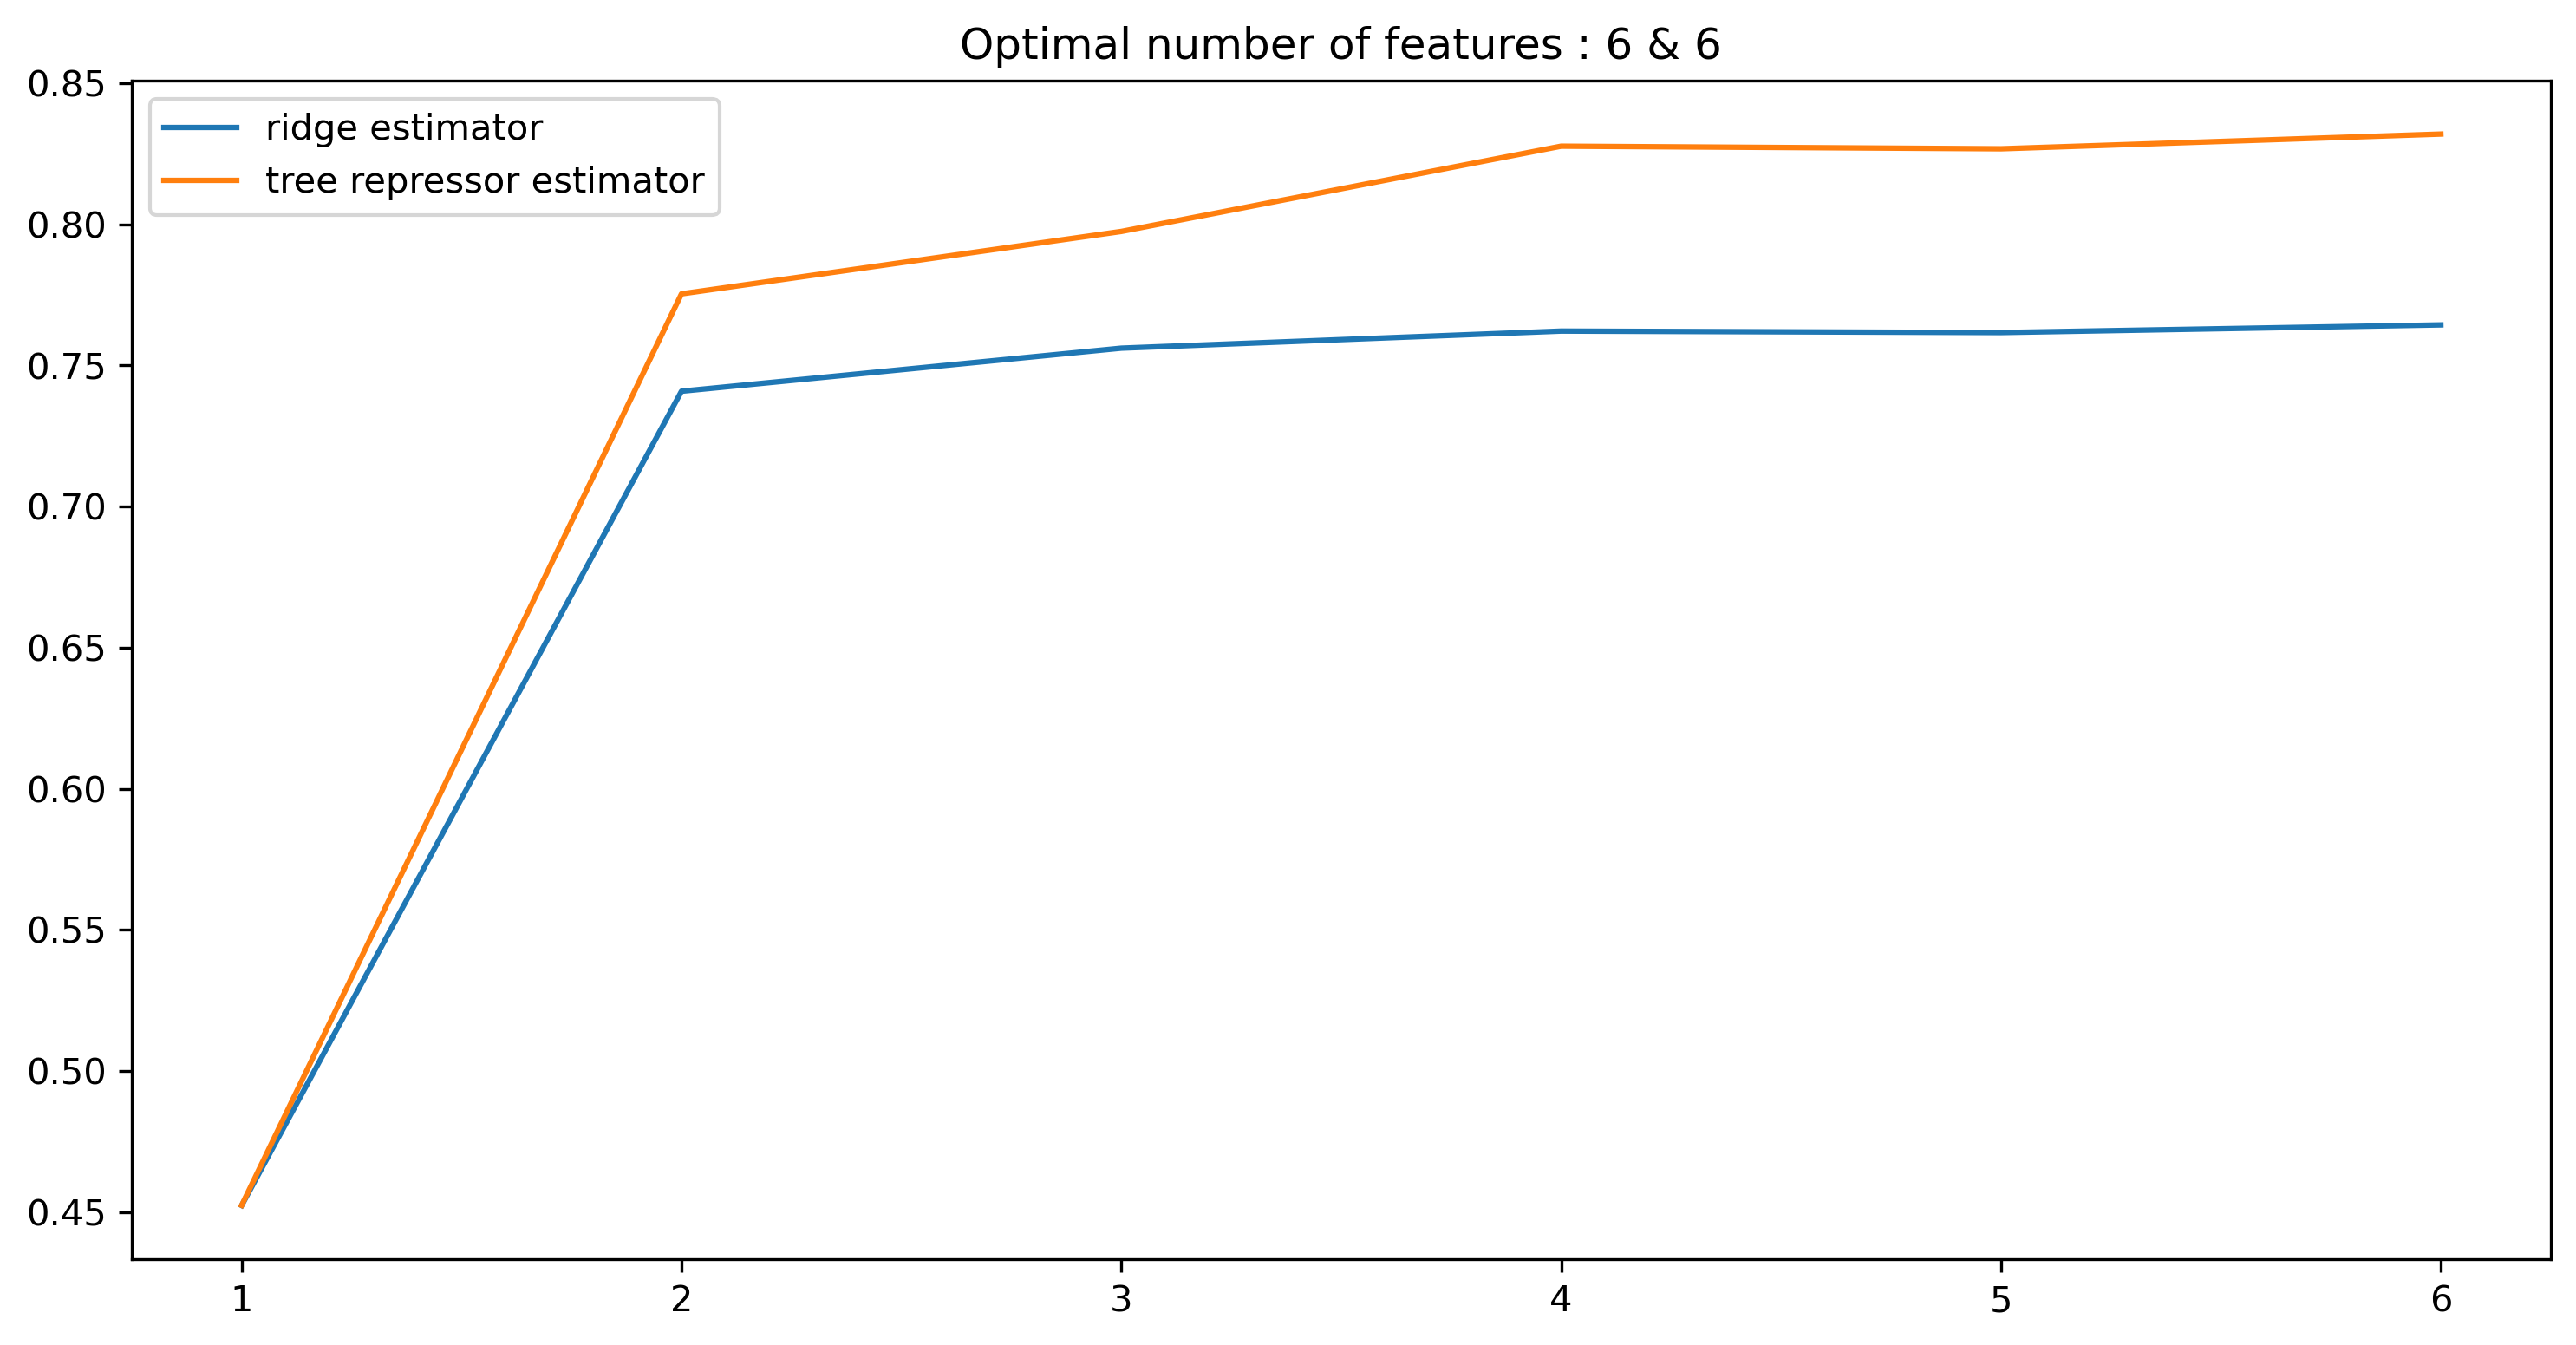

In [40]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=range(1, len(rfcv_model.grid_scores_) + 1), y=rfcv_model.grid_scores_,
             label='ridge estimator')
sns.lineplot(x=range(1, len(rfcv_model_tree.grid_scores_) + 1), y=rfcv_model_tree.grid_scores_,
             label='tree repressor estimator')
plt.legend()
plt.title(f'Optimal number of features : {rfcv_model.n_features_} & {rfcv_model_tree.n_features_}')
plt.savefig('../../demo/feature_selection_rfecv.png')
plt.show()